# HR Analytics Project- Understanding the Attrition in HR

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

# HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

# Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

# Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# Importing the required Libraries into Python

In [79]:
df=pd.read_csv("Employee attrition.csv")
df                                                  #loading dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [80]:
df=pd.DataFrame(data=df)    #giving structural format to dataset
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# EDA (Exploratory Data Analysis):

In [81]:
df.shape

(1470, 35)

In [82]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [83]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [84]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [85]:
df.columns           # Displaying all the columns in the Dataset

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [86]:
df.info()      # Displaying the total missing values and Data Type of every column of the hr analytics Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

As we can see there are no null values in our dataset, we have few columns with object data and few columns with integer data type

In [87]:
df.isnull().sum()                              #no null values in our dataset

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:>

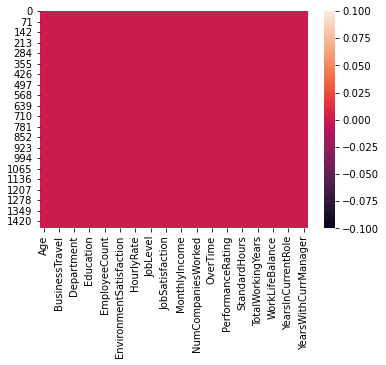

In [88]:
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='Attrition', ylabel='count'>

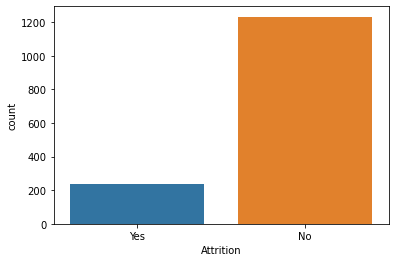

In [89]:
sns.countplot(df["Attrition"])


We can see that there are very less people who leave organisation as compared to who dont.Clearly in this case we have a class imbalance problem

<AxesSubplot:xlabel='Attrition', ylabel='count'>

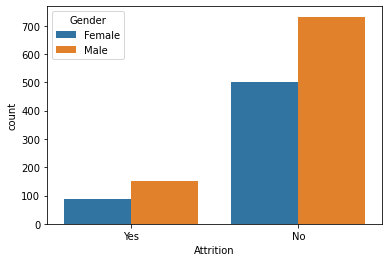

In [90]:
sns.countplot(df["Attrition"],hue=df["Gender"])

Graphical Representation of People leaving the organisation with their gender information

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

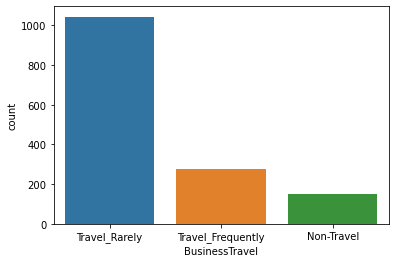

In [91]:
sns.countplot(df["BusinessTravel"])

Graphical Representation shows that there are most people in category which rarely travel

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

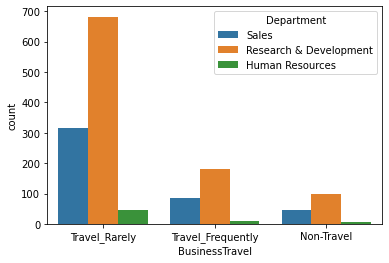

In [92]:
sns.countplot(df["BusinessTravel"],hue=df["Department"])

 Graphical Representation shows that Most people who dont travel are from Research & Development department

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

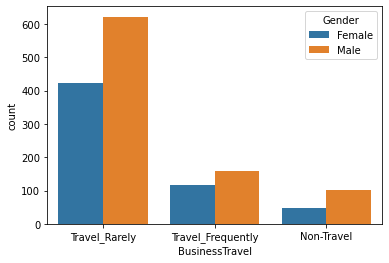

In [93]:
sns.countplot(df["BusinessTravel"],hue=df["Gender"])

Graphical Representation shows that Females travels less as compare to males

<AxesSubplot:xlabel='Department', ylabel='count'>

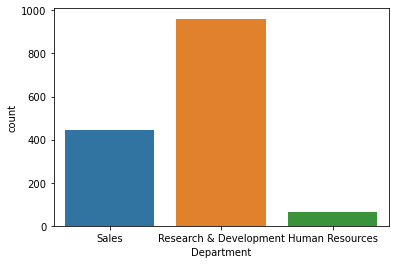

In [94]:
sns.countplot(df["Department"])

Graphical Representation shows the names of all the departments

<AxesSubplot:xlabel='EducationField', ylabel='count'>

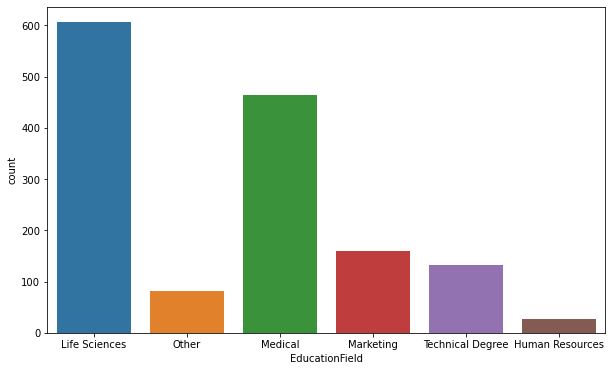

In [95]:
plt.figure(figsize=(10,6))
sns.countplot(df["EducationField"])

Graphical Representation showing the Education Fields of all the employees

<AxesSubplot:xlabel='EducationField', ylabel='count'>

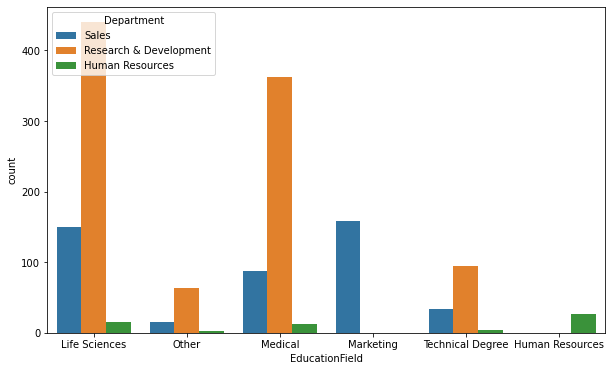

In [96]:
plt.figure(figsize=(10,6))
sns.countplot(df["EducationField"],hue=df["Department"])

Graphical Representation showing the Education Fields of all the employees with their respective departments

<AxesSubplot:xlabel='Department', ylabel='count'>

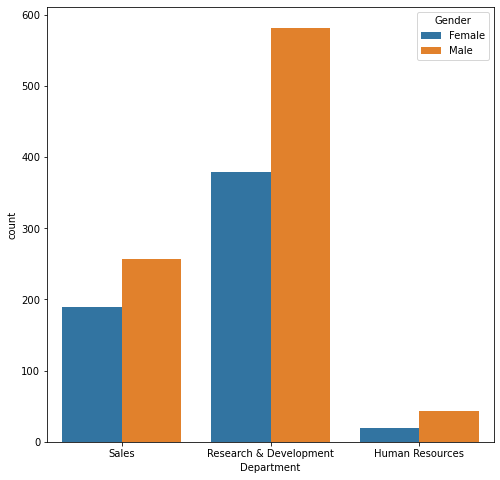

In [97]:
plt.figure(figsize=(8,8))
sns.countplot(df["Department"],hue=df["Gender"])


Graphical Representation showing the gender wise distribution in each department.Research & Development Department has most Males and Females working

<AxesSubplot:xlabel='EducationField', ylabel='count'>

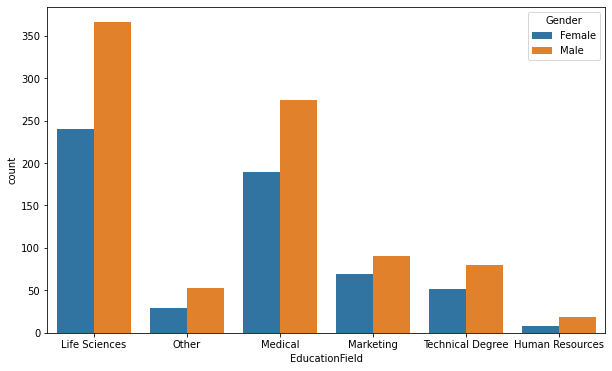

In [98]:
plt.figure(figsize=(10,6))
sns.countplot(df["EducationField"],hue=df["Gender"])

Graphical Representation showing the Education Fields of all the employees with their gender.All Education Fields have higher ratio of Male to Female

<AxesSubplot:xlabel='JobRole', ylabel='count'>

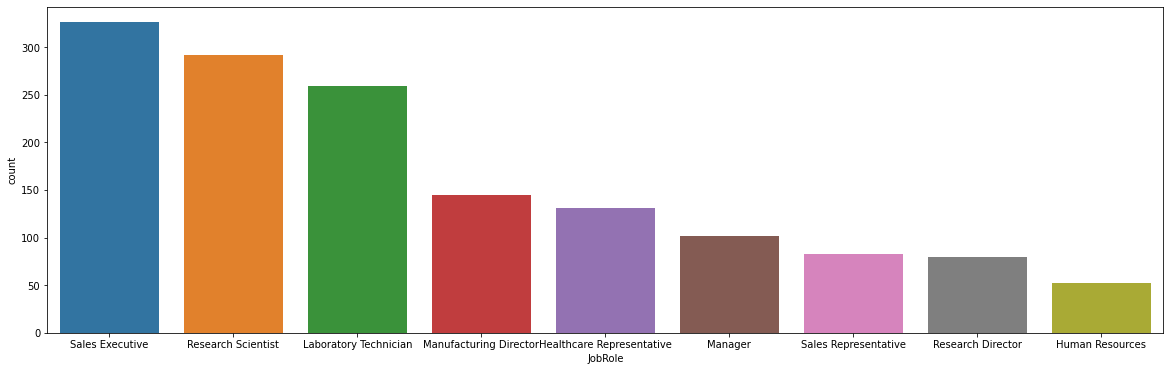

In [99]:
plt.figure(figsize=(20,6))
sns.countplot(df["JobRole"])

 Graphical Representation showing the Job Roles of all the employees. Most people are in Sales Job Role and least in Humar Resource

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

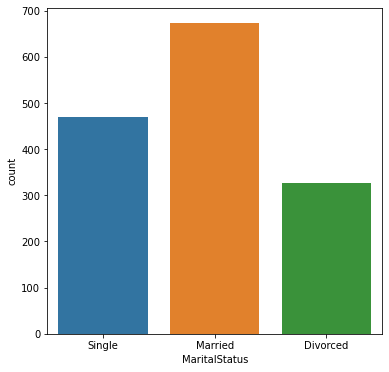

In [100]:
plt.figure(figsize=(6,6))
sns.countplot(df["MaritalStatus"])

Graphical Representation showing the Marital Status of all the employees.Most Employees in the organisation are married

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

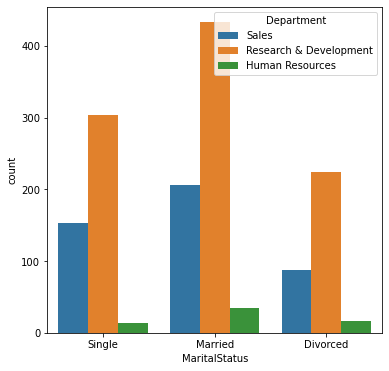

In [101]:
plt.figure(figsize=(6,6))
sns.countplot(df["MaritalStatus"], hue=df["Department"])

Graphical Representation of Marital Status of employees according to their departments

<AxesSubplot:xlabel='Over18', ylabel='count'>

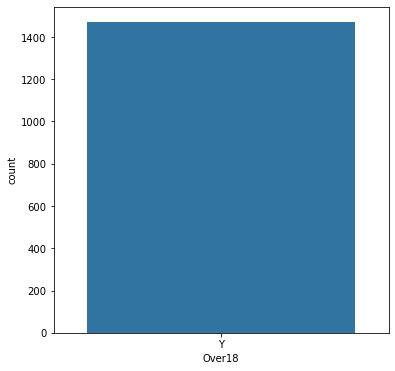

In [102]:
plt.figure(figsize=(6,6))
sns.countplot(df["Over18"])


Here we can see that throughout all rows the value is same and all employees are above 18, so we will drop this column

<AxesSubplot:xlabel='OverTime', ylabel='count'>

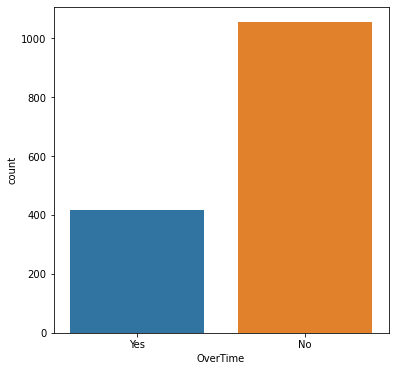

In [103]:
plt.figure(figsize=(6,6))
sns.countplot(df["OverTime"])

Showing the number of employees who work overtime in contrast to those who dont

<AxesSubplot:xlabel='OverTime', ylabel='count'>

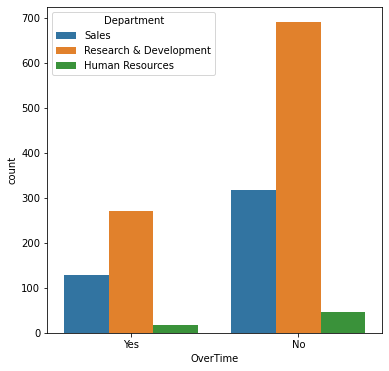

In [104]:
plt.figure(figsize=(6,6))
sns.countplot(df["OverTime"],hue=df["Department"])

Graphical Representation of employees working overtime according to their departments

<AxesSubplot:xlabel='Department', ylabel='DailyRate'>

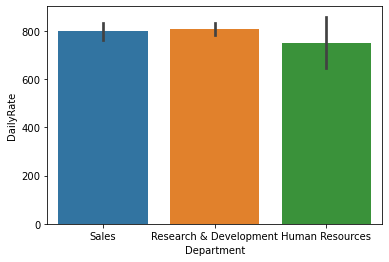

In [105]:
sns.barplot(x=df["Department"],y=df["DailyRate"])

Graphical Representation of Department daily rates paid to the employees. We can see that all departments almost has equal pay

<AxesSubplot:xlabel='Department', ylabel='EnvironmentSatisfaction'>

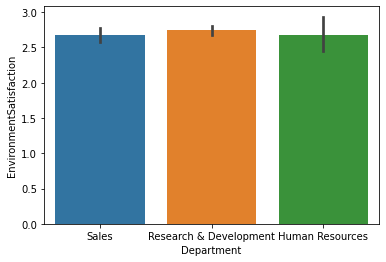

In [106]:
sns.barplot(x=df["Department"],y=df["EnvironmentSatisfaction"])

Graphical Representation of the Environmental Satisfaction according to working in different departments

<AxesSubplot:xlabel='Gender', ylabel='EnvironmentSatisfaction'>

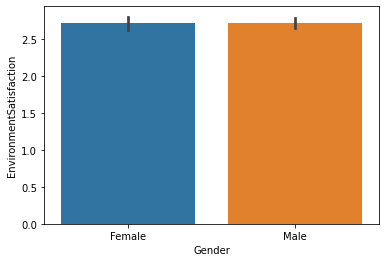

In [107]:
sns.barplot(x=df["Gender"],y=df["EnvironmentSatisfaction"])

Graphical Representation of the Environmental Satisfaction according to the gender which shows equal satisfaction

<AxesSubplot:xlabel='Gender', ylabel='HourlyRate'>

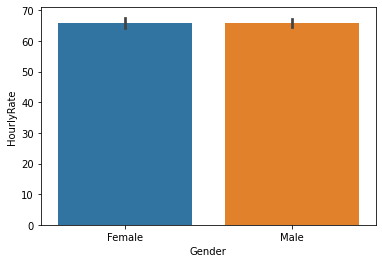

In [108]:
sns.barplot(x=df["Gender"],y=df["HourlyRate"])

Graphical Representation of the Hourly rate according to gender is equal which means the organization follows equal pay

<AxesSubplot:xlabel='Gender', ylabel='MonthlyRate'>

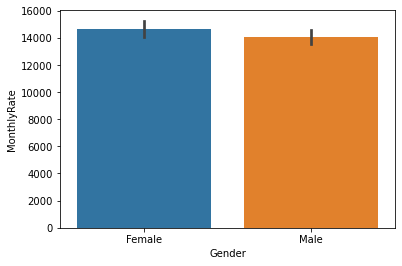

In [109]:
sns.barplot(x=df["Gender"],y=df["MonthlyRate"])

Graphical Representation of the Monthly rate according to gender is equal which means the organization follows equal pay

<AxesSubplot:xlabel='Gender', ylabel='PercentSalaryHike'>

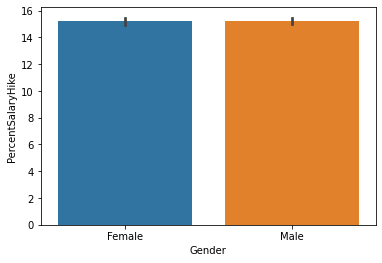

In [110]:
sns.barplot(x=df["Gender"],y=df["PercentSalaryHike"])

Graphical Representation of the Percent Salary Hike according to gender is equal, which means the organization follows equal pay

<AxesSubplot:xlabel='OverTime', ylabel='PerformanceRating'>

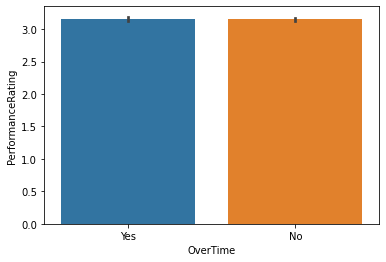

In [111]:
sns.barplot(x=df["OverTime"],y=df["PerformanceRating"])

Graphical Representation of the Performance Rating according to overtime shows it does not have any impact on performance

<AxesSubplot:xlabel='PerformanceRating', ylabel='PercentSalaryHike'>

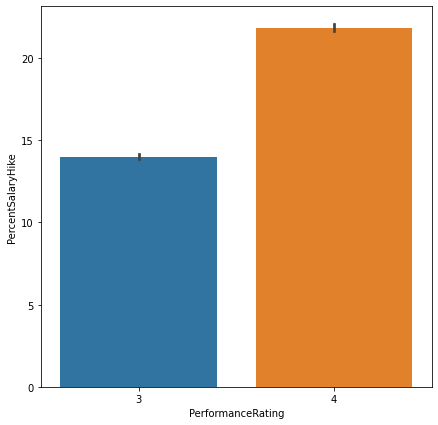

In [112]:
plt.figure(figsize=(7,7))
sns.barplot(x=df["PerformanceRating"],y=df["PercentSalaryHike"])

Graphical Representation shows that the performance rating affects the salary hike,which means the better performance the better salary 

<AxesSubplot:xlabel='YearsAtCompany', ylabel='JobSatisfaction'>

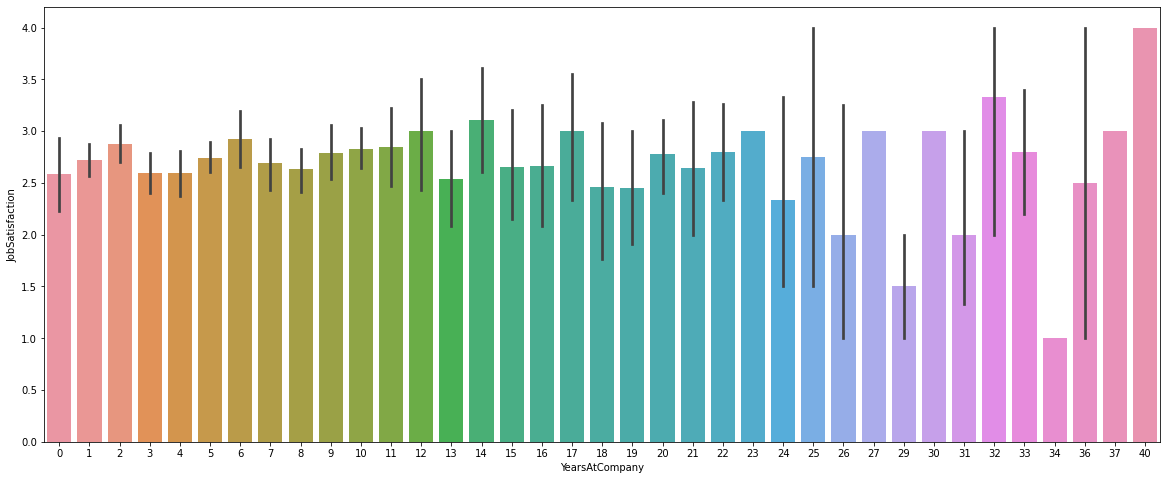

In [113]:
plt.figure(figsize=(20,8))
sns.barplot(x=df["YearsAtCompany"],y=df["JobSatisfaction"])

Graphical Representation shows that years spent at company does not have direct relation with job satisfaction

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='YearsWithCurrManager'>

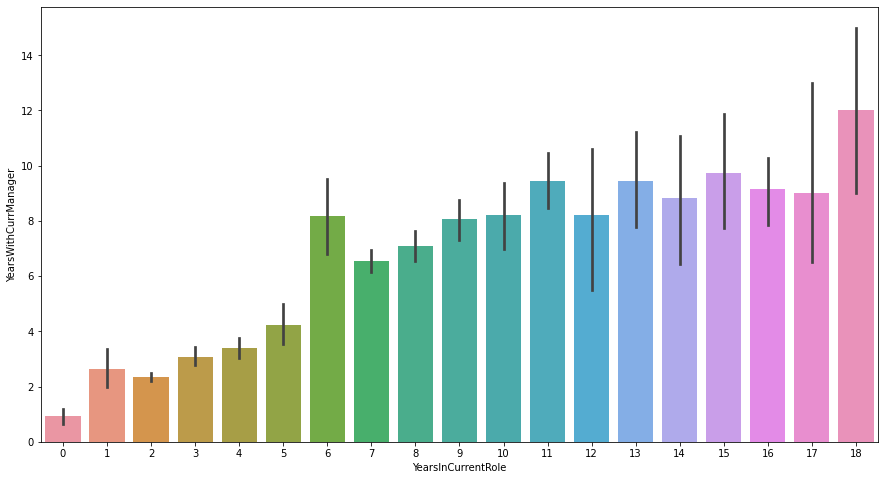

In [114]:
plt.figure(figsize=(15,8))
sns.barplot(x=df["YearsInCurrentRole"],y=df["YearsWithCurrManager"])

Graphical Representation shows that the people working under current role are mostly working under same current manager 

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='JobSatisfaction'>

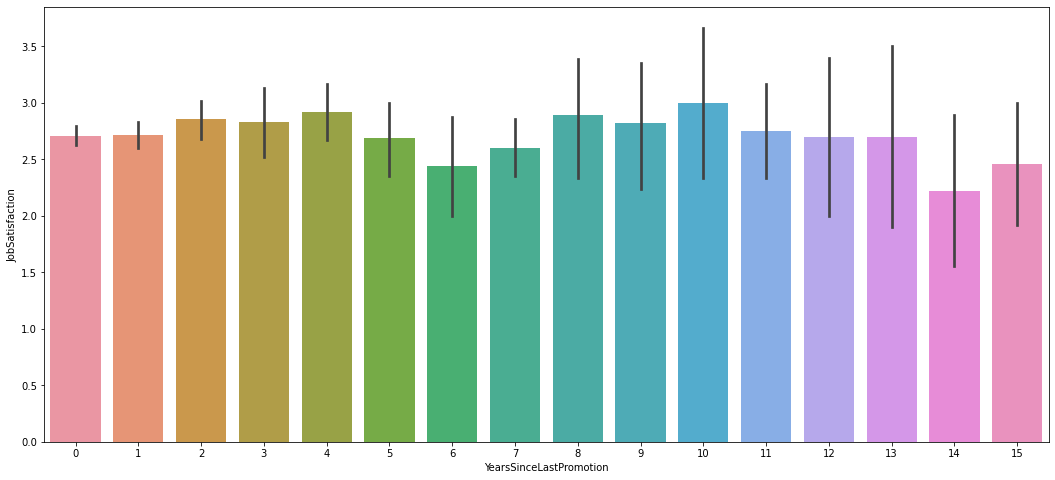

In [115]:
plt.figure(figsize=(18,8))
sns.barplot(x=df["YearsSinceLastPromotion"],y=df["JobSatisfaction"])

Graphical Representation shows that years since last promotion somewhat affects job satisfaction

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='JobLevel'>

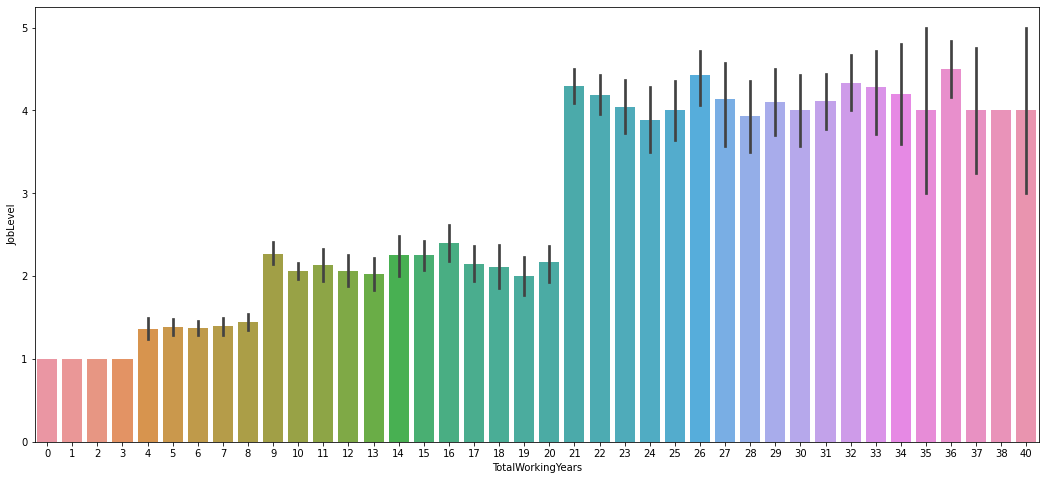

In [116]:
plt.figure(figsize=(18,8))
sns.barplot(x=df["TotalWorkingYears"],y=df["JobLevel"])

Graphical Representation showing increase in job level with increase in total working years 

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='YearsWithCurrManager'>

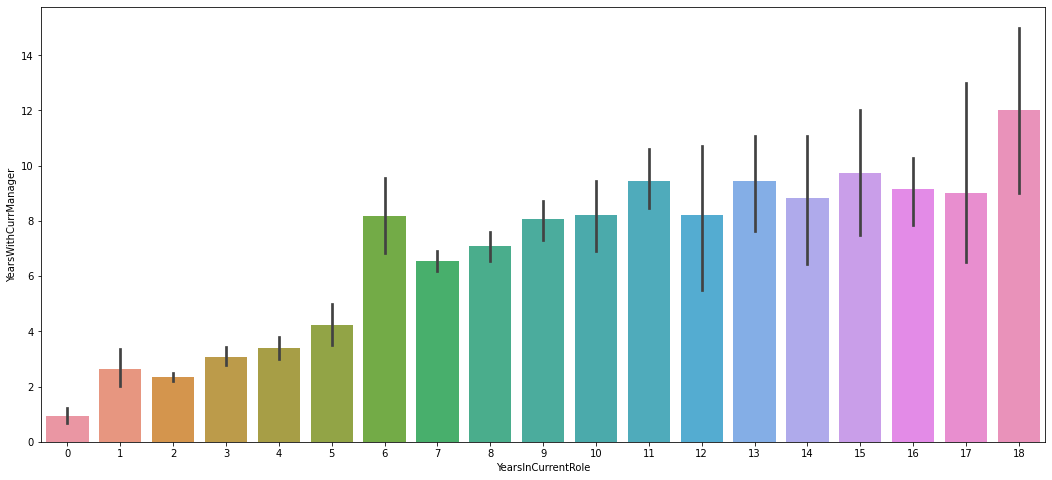

In [117]:
plt.figure(figsize=(18,8))
sns.barplot(x=df["YearsInCurrentRole"],y=df["YearsWithCurrManager"])

Graphical Representation shows that the people working under current role are mostly working under same current manager 

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='JobLevel'>

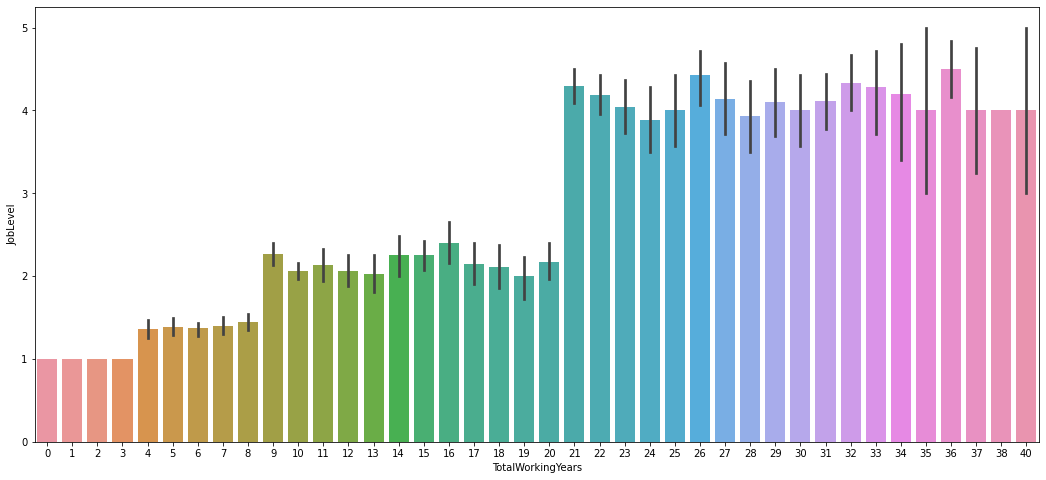

In [118]:
plt.figure(figsize=(18,8))
sns.barplot(x=df["TotalWorkingYears"],y=df["JobLevel"])

Graphical Representation showing increase in job level with increase in total working years 

# Label Encoding

In [119]:
from sklearn.preprocessing import LabelEncoder

# Importing Label Encoder from sklearn Library

In [120]:
le=LabelEncoder()

In [121]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))
        
# Running a for loop to give numeric values to strings using the Label Encoder in training data

In [122]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


# Correlation:

In [123]:
df_corr=df.corr()
df_corr                  # Showing the correlation between independent variables and target variable

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,...,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,...,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,...,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


<AxesSubplot:>

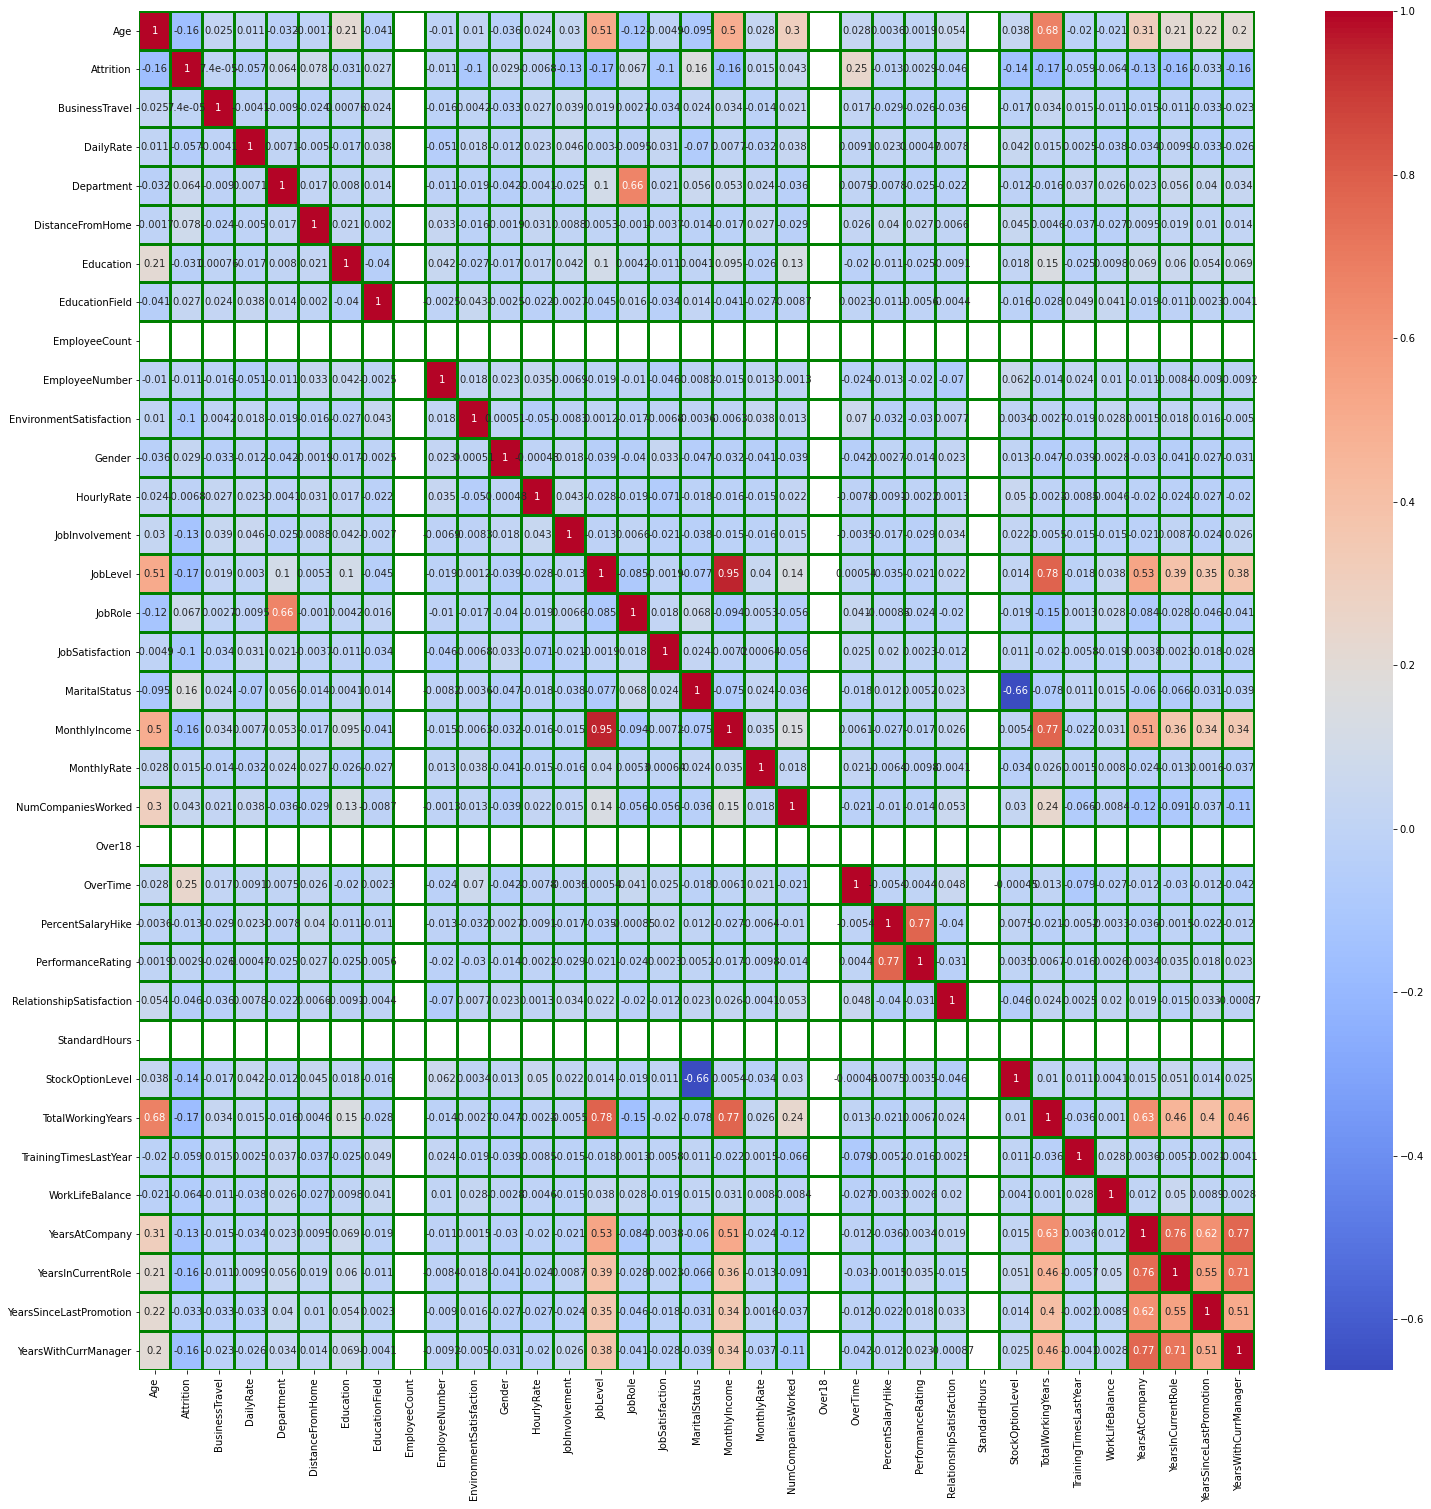

In [124]:
plt.figure(figsize=(25,25))
sns.heatmap(df_corr,annot=True,linewidths=2, cmap='coolwarm',linecolor='green')

1.Heatmap showing the correlation of independent variables with target variable, 

2.Percent Salary hike is very positively related with performance rating,

3.Years at company and years with current manager has high positive relationship

# Outlier detection:

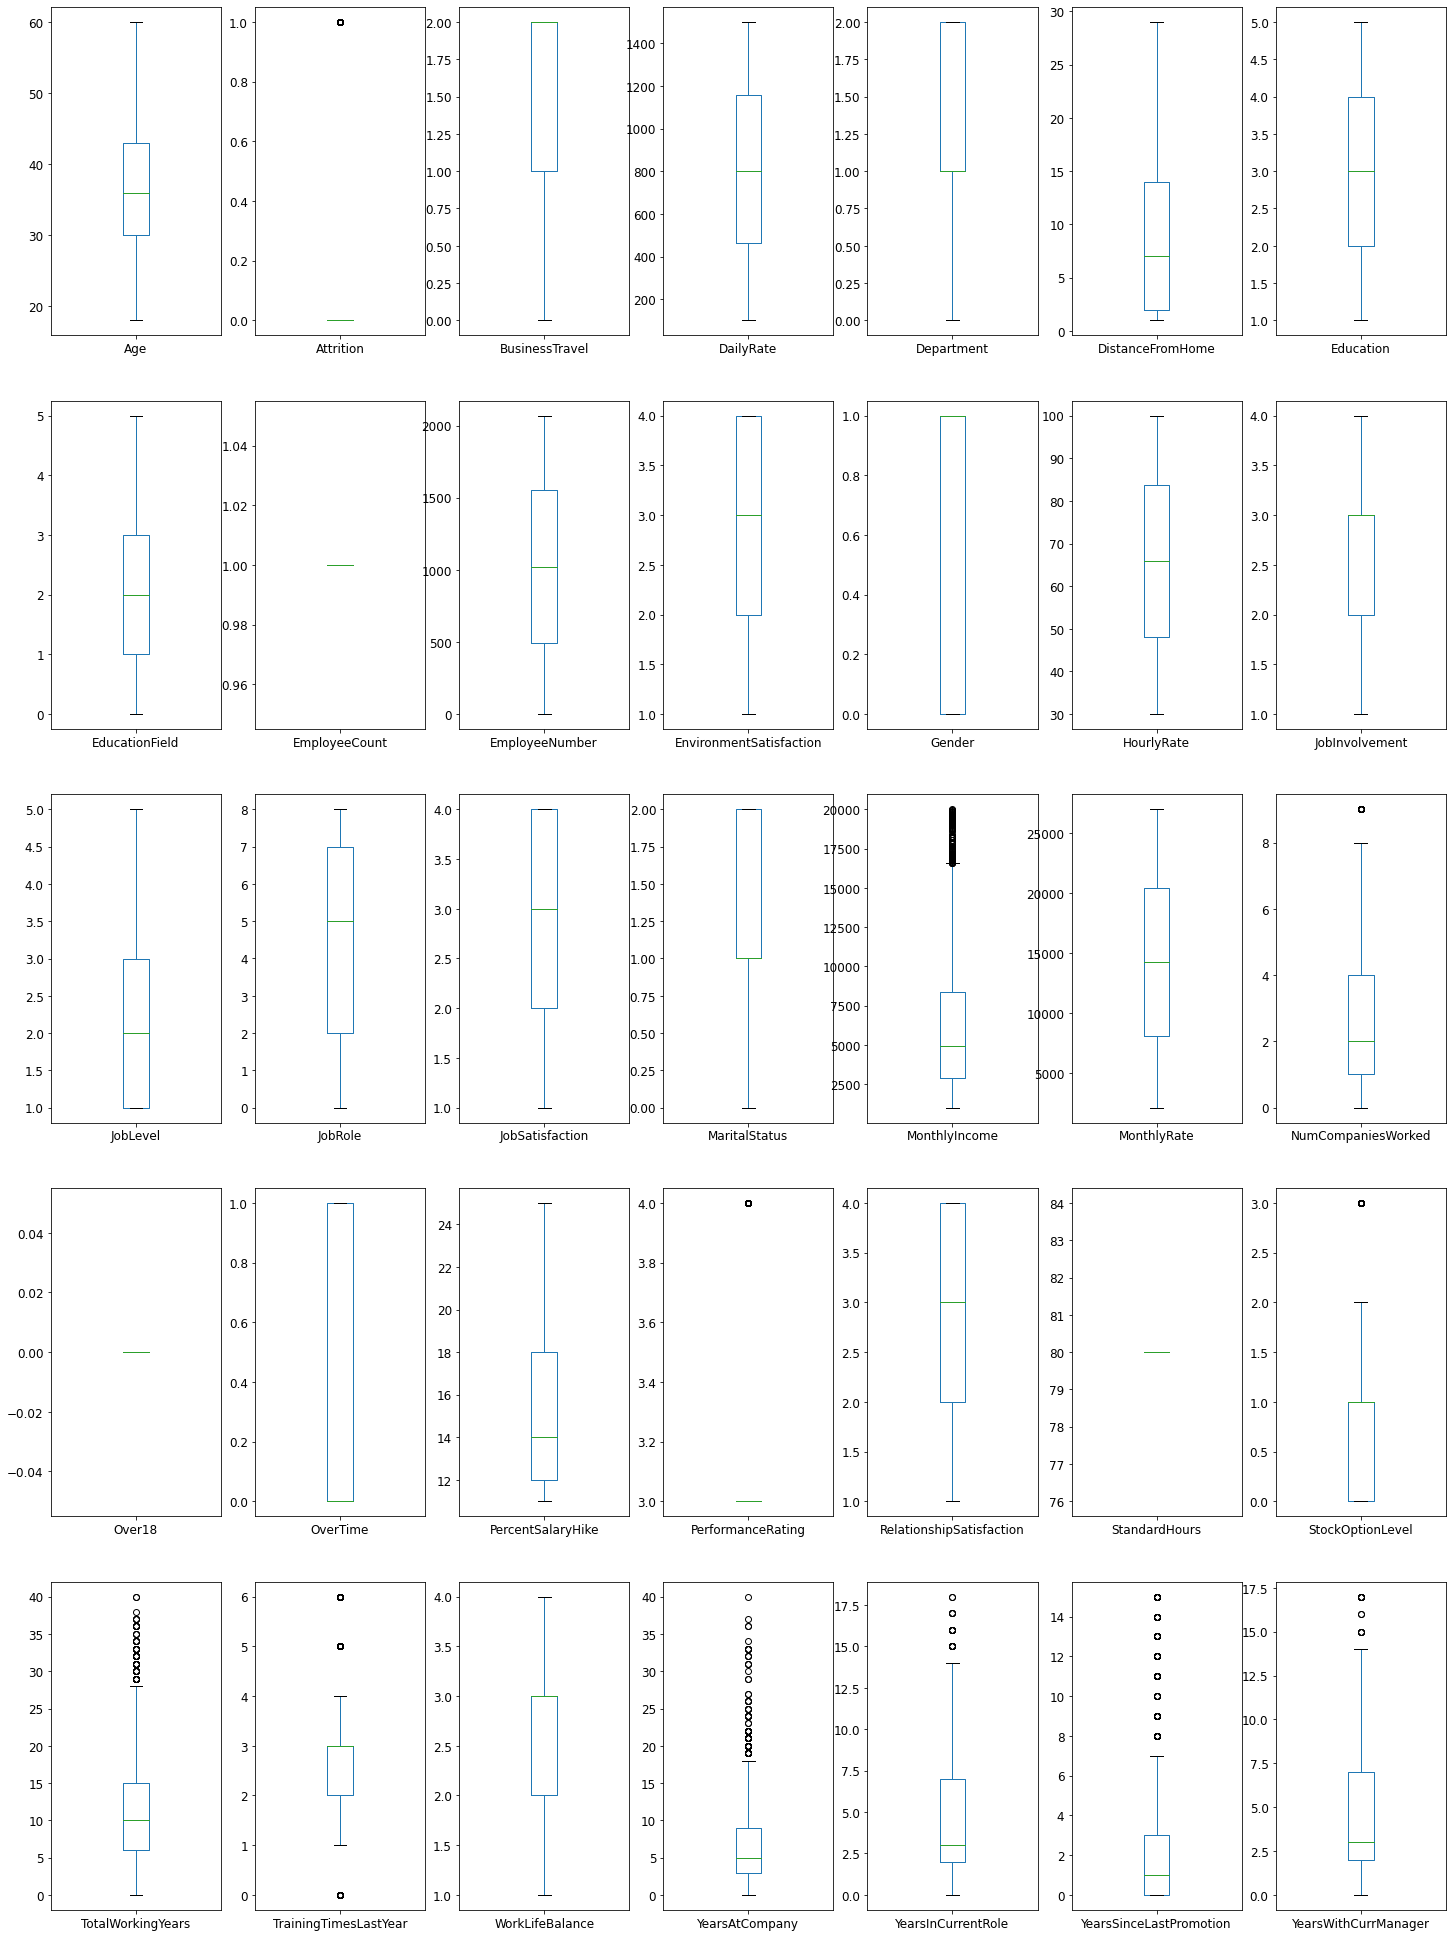

In [125]:
df.plot(kind="box", subplots=True, layout=(5,7), figsize=(25,35), fontsize=12)
plt.show()

Graphical Representation of Boxplots of all the columns. Few columns represent many outliers present in the dataset.
Columns with outliers are:
    
attrition, 

Monthly income, 

Num companies worked, 

perforamace rating,

stock option level,

Total working years, 

training times last year,

years at company, 

years in current role,

years since last promotion, 

years with curr manager

# Checking skewness:

In [126]:
df.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

In [127]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

Checking the skewness of the columns in the dataset

Many columns have high skewness level

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Density'>

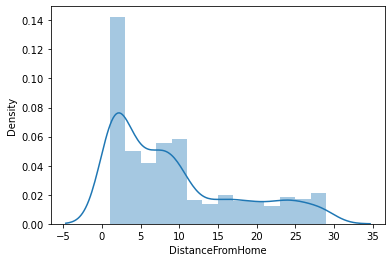

In [128]:
sns.distplot(df["DistanceFromHome"])

Distance From Home column has high skewness towards right, data is not distributed normally

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

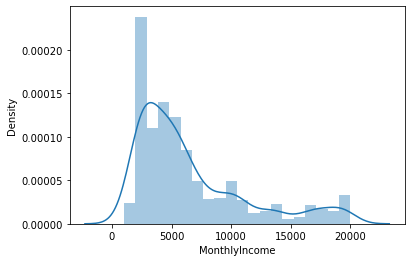

In [129]:
sns.distplot(df["MonthlyIncome"])

Monthly Income column has high skewness towards right. data is not distributed normally

<AxesSubplot:xlabel='JobLevel', ylabel='Density'>

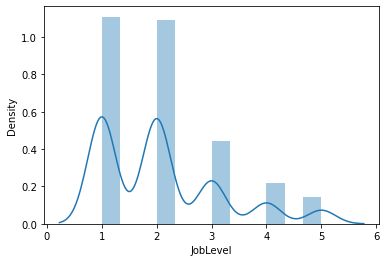

In [130]:
sns.distplot(df["JobLevel"])

Job Level column has high skewness towards right

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='Density'>

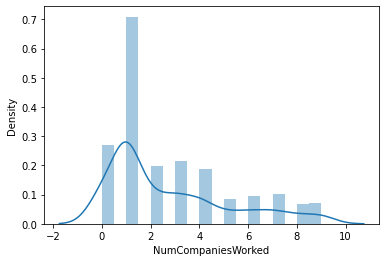

In [131]:
sns.distplot(df["NumCompaniesWorked"])

Number of Companies Worked column has high skewness towards right. data is not distributed normally

<AxesSubplot:xlabel='PerformanceRating', ylabel='Density'>

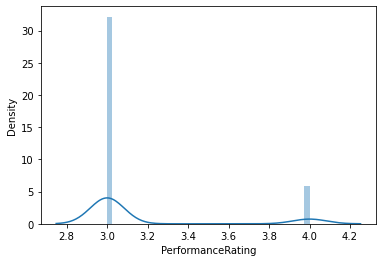

In [132]:
sns.distplot(df["PerformanceRating"])

Performance Rating column has high skewness towards right

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='Density'>

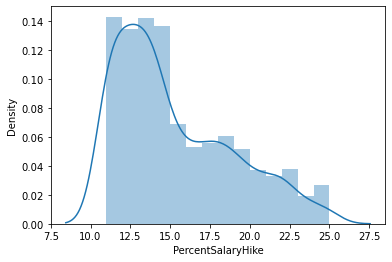

In [133]:
sns.distplot(df["PercentSalaryHike"])

Percent Salary Hike column has high skewness towards right. data is not distributd normally

<AxesSubplot:xlabel='StockOptionLevel', ylabel='Density'>

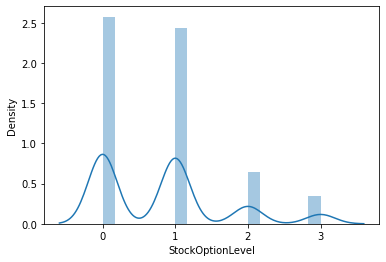

In [134]:
sns.distplot(df["StockOptionLevel"])

Stock Option Level column has high skewness towards right. 

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Density'>

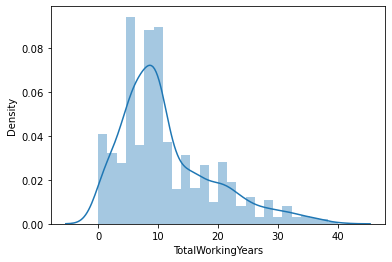

In [135]:
sns.distplot(df["TotalWorkingYears"])

Total Working Years column has high skewness towards right. data is not distributed normally

<AxesSubplot:xlabel='YearsAtCompany', ylabel='Density'>

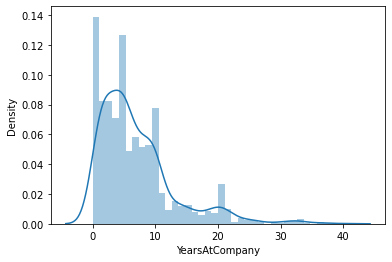

In [136]:
sns.distplot(df["YearsAtCompany"])

Years At Company column has high skewness towards right. data is not distributed normally

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='Density'>

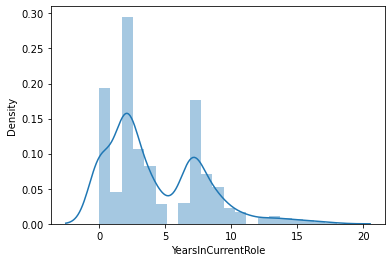

In [137]:
sns.distplot(df["YearsInCurrentRole"])

Years In Current Role column has high skewness towards right. data is not distributed normally

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Density'>

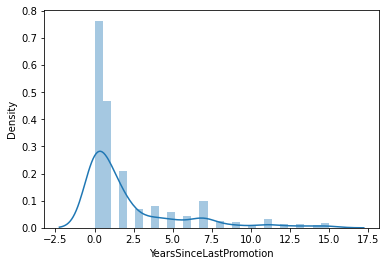

In [138]:
sns.distplot(df["YearsSinceLastPromotion"])

Years Since Last Promotion column has high skewness towards right. data is not distributed normally

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='Density'>

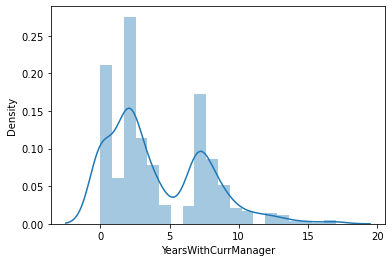

In [139]:
sns.distplot(df["YearsWithCurrManager"])

Years With Current Manager column has high skewness towards right. data is not distributed normally

# Data cleaning:

EmployeeCount, Over18, StandardHours columns are to be dropped as they have same values throught all rows and have no correlation with target variable.

In [140]:
df.drop(columns=["EmployeeCount","Over18","StandardHours"],inplace=True) 

In [141]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,2065,4,...,3,4,0,17,3,2,9,6,0,8


In [142]:
df.drop(columns=["YearsSinceLastPromotion","RelationshipSatisfaction","PerformanceRating","PercentSalaryHike",
                          "NumCompaniesWorked","MonthlyRate","HourlyRate","Gender","EmployeeNumber","EducationField",
                          "Education",],inplace=True)
df

# These all columns are to be dropped as they dont have correlation with the target variable

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,...,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,1,2,1102,2,1,2,3,2,7,...,2,5993,1,0,8,0,1,6,4,5
1,49,0,1,279,1,8,3,2,2,6,...,1,5130,0,1,10,3,3,10,7,7
2,37,1,2,1373,1,2,4,2,1,2,...,2,2090,1,0,7,3,3,0,0,0
3,33,0,1,1392,1,3,4,3,1,6,...,1,2909,1,0,8,3,3,8,7,0
4,27,0,2,591,1,2,1,3,1,2,...,1,3468,0,1,6,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,3,4,2,2,...,1,2571,0,1,17,3,3,5,2,3
1466,39,0,2,613,1,6,4,2,3,0,...,1,9991,0,1,9,5,3,7,7,7
1467,27,0,2,155,1,4,2,4,2,4,...,1,6142,1,1,6,0,3,6,2,3
1468,49,0,1,1023,2,2,4,2,2,7,...,1,5390,0,0,17,3,2,9,6,8


# Outlier removal

In [143]:
from scipy.stats import zscore 

In [144]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,...,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,1,2,1102,2,1,2,3,2,7,...,2,5993,1,0,8,0,1,6,4,5
1,49,0,1,279,1,8,3,2,2,6,...,1,5130,0,1,10,3,3,10,7,7
2,37,1,2,1373,1,2,4,2,1,2,...,2,2090,1,0,7,3,3,0,0,0
3,33,0,1,1392,1,3,4,3,1,6,...,1,2909,1,0,8,3,3,8,7,0
4,27,0,2,591,1,2,1,3,1,2,...,1,3468,0,1,6,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,3,4,2,2,...,1,2571,0,1,17,3,3,5,2,3
1466,39,0,2,613,1,6,4,2,3,0,...,1,9991,0,1,9,5,3,7,7,7
1467,27,0,2,155,1,4,2,4,2,4,...,1,6142,1,1,6,0,3,6,2,3
1468,49,0,1,1023,2,2,4,2,2,7,...,1,5390,0,0,17,3,2,9,6,8


In [145]:
z=np.abs(zscore(df))
z
#We are taking the absolute of the zscore so all the values will be displayed in positive standard Deviation

array([[0.4463504 , 2.28090588, 0.59004834, ..., 0.16461311, 0.0632959 ,
        0.24583399],
       [1.32236521, 0.4384223 , 0.91319439, ..., 0.48850773, 0.76499762,
        0.80654148],
       [0.008343  , 2.28090588, 0.59004834, ..., 1.14429437, 1.16768726,
        1.15593471],
       ...,
       [1.08667552, 0.4384223 , 0.59004834, ..., 0.16461311, 0.61549158,
        0.31487349],
       [1.32236521, 0.4384223 , 0.91319439, ..., 0.32522752, 0.48889978,
        1.08689522],
       [0.32016256, 0.4384223 , 0.59004834, ..., 0.49117353, 0.33939374,
        0.59522723]])

In [146]:
print(np.where(z>3))

# Printing the integer location of all the values that have Standard Deviation greater than +3
# These points determine the point of outliers

(array([  28,   62,   63,   85,   98,   98,  123,  123,  126,  126,  153,
        187,  187,  190,  190,  231,  231,  237,  270,  270,  281,  386,
        401,  411,  425,  445,  466,  473,  477,  561,  561,  592,  595,
        595,  616,  624,  635,  653,  677,  686,  716,  746,  749,  861,
        875,  894,  914,  918,  926,  956,  962,  976, 1024, 1043, 1078,
       1086, 1111, 1116, 1116, 1135, 1138, 1184, 1301, 1327, 1348, 1351,
       1401, 1430], dtype=int64), array([20, 18, 19, 15, 15, 18, 19, 20, 15, 18, 20, 15, 20, 18, 19, 19, 20,
       18, 15, 18, 19, 20, 15, 18, 18, 15, 19, 18, 18, 18, 20, 18, 15, 18,
       20, 15, 20, 18, 18, 20, 19, 19, 18, 18, 20, 15, 18, 18, 20, 15, 18,
       19, 19, 15, 20, 18, 18, 15, 18, 18, 18, 15, 15, 19, 20, 19, 15, 19],
      dtype=int64))


In [147]:
df_new=df[(z<3).all(axis=1)] 
df_new

# Taking all the values within +3 Standard Deviation and saving it in another DataFrame "df_new"
# This new Dataset formed is without the outliers

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,...,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,1,2,1102,2,1,2,3,2,7,...,2,5993,1,0,8,0,1,6,4,5
1,49,0,1,279,1,8,3,2,2,6,...,1,5130,0,1,10,3,3,10,7,7
2,37,1,2,1373,1,2,4,2,1,2,...,2,2090,1,0,7,3,3,0,0,0
3,33,0,1,1392,1,3,4,3,1,6,...,1,2909,1,0,8,3,3,8,7,0
4,27,0,2,591,1,2,1,3,1,2,...,1,3468,0,1,6,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,3,4,2,2,...,1,2571,0,1,17,3,3,5,2,3
1466,39,0,2,613,1,6,4,2,3,0,...,1,9991,0,1,9,5,3,7,7,7
1467,27,0,2,155,1,4,2,4,2,4,...,1,6142,1,1,6,0,3,6,2,3
1468,49,0,1,1023,2,2,4,2,2,7,...,1,5390,0,0,17,3,2,9,6,8


In [148]:
df.shape

(1470, 21)

In [149]:
df_new.shape

(1412, 21)

In [150]:
data_loss=((1470-1412)/1470)*100
data_loss

# The Data Loss is 3.94% which is less than 5%, Therefore we will drop the outliers

3.9455782312925165

In [151]:
df_new

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,...,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,1,2,1102,2,1,2,3,2,7,...,2,5993,1,0,8,0,1,6,4,5
1,49,0,1,279,1,8,3,2,2,6,...,1,5130,0,1,10,3,3,10,7,7
2,37,1,2,1373,1,2,4,2,1,2,...,2,2090,1,0,7,3,3,0,0,0
3,33,0,1,1392,1,3,4,3,1,6,...,1,2909,1,0,8,3,3,8,7,0
4,27,0,2,591,1,2,1,3,1,2,...,1,3468,0,1,6,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,3,4,2,2,...,1,2571,0,1,17,3,3,5,2,3
1466,39,0,2,613,1,6,4,2,3,0,...,1,9991,0,1,9,5,3,7,7,7
1467,27,0,2,155,1,4,2,4,2,4,...,1,6142,1,1,6,0,3,6,2,3
1468,49,0,1,1023,2,2,4,2,2,7,...,1,5390,0,0,17,3,2,9,6,8


# Skewness removal:

# splitting the independent and target variable in x and y before removing skewness

In [153]:
x = df_new.drop("Attrition",axis =1)    #taking all independent variable into x
y = df_new["Attrition"]                 #taking dependent variable into y

In [154]:
x.shape

(1412, 20)

In [155]:
y.shape

(1412,)

In [156]:
x.skew()

Age                        0.449721
BusinessTravel            -1.422121
DailyRate                 -0.020661
Department                 0.183220
DistanceFromHome           0.959593
EnvironmentSatisfaction   -0.327542
JobInvolvement            -0.492319
JobLevel                   1.098427
JobRole                   -0.379654
JobSatisfaction           -0.341911
MaritalStatus             -0.156517
MonthlyIncome              1.494853
OverTime                   0.962926
StockOptionLevel           0.962487
TotalWorkingYears          0.980264
TrainingTimesLastYear      0.570202
WorkLifeBalance           -0.551079
YearsAtCompany             1.292889
YearsInCurrentRole         0.767746
YearsWithCurrManager       0.688839
dtype: float64

In [157]:
from sklearn.preprocessing import power_transform

# Importing the power_transform function to reduce the over skewness in dataset

In [158]:
x_new=power_transform(x)
df_new=pd.DataFrame(x_new,columns=x.columns)

# Applying power_transform function and making new data frame of modified skewness dataset

In [159]:
df_new.skew()
# New and improved skewness is what we are getting after applying power_transform function

Age                       -0.005150
BusinessTravel            -0.954760
DailyRate                 -0.199865
Department                 0.014923
DistanceFromHome          -0.008496
EnvironmentSatisfaction   -0.204823
JobInvolvement            -0.019244
JobLevel                   0.107929
JobRole                   -0.334680
JobSatisfaction           -0.216837
MaritalStatus             -0.158234
MonthlyIncome              0.000000
OverTime                   0.962926
StockOptionLevel           0.090822
TotalWorkingYears         -0.015022
TrainingTimesLastYear      0.058118
WorkLifeBalance           -0.012638
YearsAtCompany            -0.021598
YearsInCurrentRole        -0.067833
YearsWithCurrManager      -0.072841
dtype: float64

In [160]:
x=df_new 

# Saving the df_new variable in x as it contains the transformed data 

In [161]:
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,0.591117,0.640518,0.746611,1.379092,-1.490305,-0.715136,0.326569,0.316430,1.022348,1.188152,1.232216,0.0,1.590597,-1.083766,-0.199104,-2.604064,-2.143331,0.198842,0.260680,0.556706
1,1.357900,-1.376686,-1.350060,-0.474105,0.245260,0.204336,-1.062067,0.316430,0.603583,-0.720563,-0.136083,0.0,-0.628695,0.546975,0.116964,0.217951,0.277621,0.885536,0.964411,0.991703
2,0.162506,0.640518,1.335467,-0.474105,-1.028708,1.213719,-1.062067,-1.150816,-1.014824,0.186523,1.232216,0.0,1.590597,-1.083766,-0.374388,0.217951,0.277621,-2.171472,-1.579125,-1.535439
3,-0.304185,-1.376686,1.375648,-0.474105,-0.698411,1.213719,0.326569,-1.150816,0.603583,0.186523,-0.136083,0.0,1.590597,-1.083766,-0.199104,0.217951,0.277621,0.573421,0.964411,-1.535439
4,-1.095164,0.640518,-0.474273,-0.474105,-1.028708,-1.526357,0.326569,-1.150816,-1.014824,-0.720563,-0.136083,0.0,-0.628695,0.546975,-0.564433,0.217951,0.277621,-0.940787,-0.410615,-0.368342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,0.049692,-1.376686,0.247301,-0.474105,1.411954,0.204336,2.016136,0.316430,-1.014824,1.188152,-0.136083,0.0,-0.628695,0.546975,0.995249,0.217951,0.277621,-0.022279,-0.410615,-0.004293
1408,0.381135,0.640518,-0.417510,-0.474105,-0.049197,1.213719,-1.062067,1.096302,-1.765945,-1.514607,-0.136083,0.0,-0.628695,0.546975,-0.035967,1.612987,0.277621,0.395655,0.964411,0.991703
1409,-1.095164,0.640518,-1.759950,-0.474105,-0.440606,-0.715136,2.016136,0.316430,-0.218907,-0.720563,-0.136083,0.0,1.590597,0.546975,-0.564433,-2.604064,0.277621,0.198842,-0.410615,-0.004293
1410,1.357900,-1.376686,0.568668,1.379092,-1.028708,1.213719,-1.062067,0.316430,1.022348,-0.720563,-0.136083,0.0,-0.628695,-1.083766,0.995249,0.217951,-1.107227,0.735820,0.755440,1.179285


In [162]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1412, dtype: int32

In [163]:
x.shape

(1412, 20)

In [164]:
y.shape

(1412,)

# Applying standard scaler:

In [165]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.59111651,  0.64051768,  0.74661102, ...,  0.19884238,
         0.26067952,  0.55670592],
       [ 1.35790021, -1.37668637, -1.35006026, ...,  0.88553646,
         0.96441072,  0.99170345],
       [ 0.16250637,  0.64051768,  1.33546675, ..., -2.17147157,
        -1.5791246 , -1.53543943],
       ...,
       [-1.09516358,  0.64051768, -1.75994966, ...,  0.19884238,
        -0.4106152 , -0.00429267],
       [ 1.35790021, -1.37668637,  0.56866755, ...,  0.73582031,
         0.75544025,  1.17928539],
       [-0.18352227,  0.64051768, -0.37908697, ..., -0.27563991,
        -0.04382182, -0.36834215]])

In [166]:
y.value_counts()

0    1179
1     233
Name: Attrition, dtype: int64

In [167]:
print(x.shape)
print(y.shape)

(1412, 20)
(1412,)


# Verifying Class Imbalance Problem:

In [168]:
y.value_counts()

0    1179
1     233
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

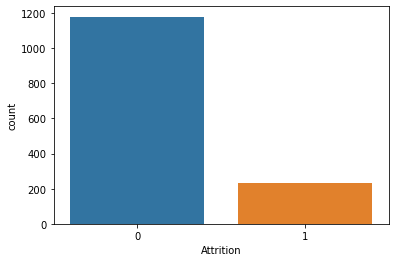

In [169]:
sns.countplot(y)

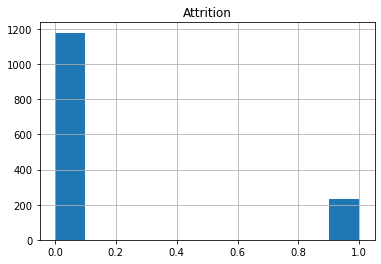

In [170]:
y.hist(grid=True)
plt.title('Attrition')
plt.show()

There is huge difference in both the classes, we can see large difference of class imbalance

# Applying SMOTE:

In [171]:
from imblearn.over_sampling import SMOTE

In [172]:
sm=SMOTE()
x,y=sm.fit_resample(x,y)

Resampling the x and y to make the class balanced and saving the new x and y in x and y again

In [173]:
y.value_counts()                # Now we can see that both the classes are balanced without losing any data

0    1179
1    1179
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

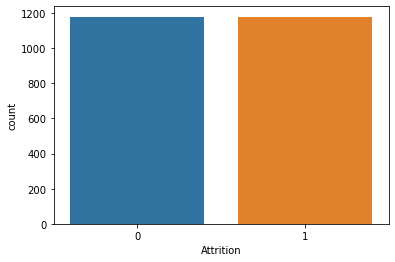

In [174]:
sns.countplot(y)                        # Now we can see that both the classes are balanced without losing any data

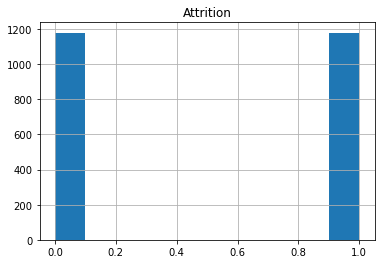

In [175]:
y.hist(grid=True)
plt.title('Attrition')
plt.show()                               # Now we can see that both the classes are balanced without losing any data

# Model Building:

# Finding Best Random State:

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Importing the algorithms and Evolution Matrix

In [177]:
MaxAccu=0
MaxRS=0

for i in range (1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predlr_train=lr.predict(x_train)
    predlr_test=lr.predict(x_test)
    acc=accuracy_score(y_test,predlr_test)
    if acc>MaxAccu:
        MaxAccu=acc
        MaxRS=i
print("Best Accuracy is ", MaxAccu, "on Random State ", MaxRS)

Best Accuracy is  0.8241525423728814 on Random State  403


# We found our best random state 403 which is giving us best accuracy score of 82.41%

# Creating train test split

In [178]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=403)

In [179]:
x_train.shape

(1886, 20)

In [180]:
y_train.shape

(1886,)

In [181]:
x_test.shape

(472, 20)

In [182]:
y_test.shape

(472,)

# Logistic Regression

In [183]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print("Accuracy score:", accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy score: 82.41525423728814
[[207  46]
 [ 37 182]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       253
           1       0.80      0.83      0.81       219

    accuracy                           0.82       472
   macro avg       0.82      0.82      0.82       472
weighted avg       0.83      0.82      0.82       472



# Decision tree classifier:

In [184]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print("Accuracy score: ",accuracy_score(y_test,preddtc)*100)
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

Accuracy score:  86.22881355932203
[[214  39]
 [ 26 193]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       253
           1       0.83      0.88      0.86       219

    accuracy                           0.86       472
   macro avg       0.86      0.86      0.86       472
weighted avg       0.86      0.86      0.86       472



# Gaussian Naive Bayes Classifier:

In [186]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print("Accuracy score: ",accuracy_score(y_test,predgnb)*100)
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

Accuracy score:  74.15254237288136
[[178  75]
 [ 47 172]]
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       253
           1       0.70      0.79      0.74       219

    accuracy                           0.74       472
   macro avg       0.74      0.74      0.74       472
weighted avg       0.75      0.74      0.74       472



# Random forest classifier:

In [187]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy score:", accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy score: 94.49152542372882
[[244   9]
 [ 17 202]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       253
           1       0.96      0.92      0.94       219

    accuracy                           0.94       472
   macro avg       0.95      0.94      0.94       472
weighted avg       0.95      0.94      0.94       472



# Support vector classifier:

In [188]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,predsvc)*100)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Accuracy score:  89.83050847457628
[[222  31]
 [ 17 202]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       253
           1       0.87      0.92      0.89       219

    accuracy                           0.90       472
   macro avg       0.90      0.90      0.90       472
weighted avg       0.90      0.90      0.90       472



# ExtraTreesClassifier:

In [189]:
from sklearn.ensemble import ExtraTreesClassifier
etr=ExtraTreesClassifier()
etr.fit(x_train,y_train)
predetr=etr.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,predetr)*100)
print(confusion_matrix(y_test,predetr))
print(classification_report(y_test,predetr))

Accuracy score:  96.1864406779661
[[241  12]
 [  6 213]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       253
           1       0.95      0.97      0.96       219

    accuracy                           0.96       472
   macro avg       0.96      0.96      0.96       472
weighted avg       0.96      0.96      0.96       472



from above models we can see that:

     Accuracy score of Logistic regression:            82.41%

     Accuracy score of Decision tree classification:   86.22%

     Accuracy score of GaussianNB classifier:           74.15%

     Accuracy score of Random forest classifier:       94.49%

     Accuracy score of Support vector classifier:      89.83%
    
     Accuracy score of ExtraTrees Classifier:          96.18%

# CROSS VALIDATION:

In [190]:
from sklearn.model_selection import cross_val_score

In [191]:
scr1=cross_val_score(lr,x,y,cv=5)
print("Cross validation score of Logistic Regression model is: ", scr1.mean())

Cross validation score of Logistic Regression model is:  0.7743945446039799


In [192]:
scr2=cross_val_score(dtc,x,y,cv=5)
print("Cross validation score of Decision Tree classifier model is: ", scr2.mean())

Cross validation score of Decision Tree classifier model is:  0.850315772427939


In [193]:
scr3=cross_val_score(gnb,x,y,cv=5)
print("Cross validation score of GaussianNB model is: ", scr3.mean())

Cross validation score of GaussianNB model is:  0.726467307207888


In [194]:
scr4=cross_val_score(rf,x,y,cv=5)
print("Cross validation score of randomForest classifier model is: ", scr4.mean())

Cross validation score of randomForest classifier model is:  0.934725970707834


In [195]:
scr5=cross_val_score(svc,x,y,cv=5)
print("Cross validation score of support vector classifier model is: ", scr5.mean())

Cross validation score of support vector classifier model is:  0.8795566591097197


In [196]:
scr6=cross_val_score(etr,x,y,cv=5)
print("Cross validation score of ExtraTress classifier model is: ", scr6.mean())

Cross validation score of ExtraTress classifier model is:  0.960571629061859


# ExtraTress classifier model is performing well as it has high cross val score of 96.05% and high accuracy score of 96.18%. (or least diff between cross val score and accuracy score. i.e, 0.13%)

# Hyper parameter tunning

In [197]:
from sklearn.model_selection import GridSearchCV
# Importing the GridSearchCV to get the best parameters of the Random Forest Classifier model

In [198]:
parameter={"max_depth":np.arange(2,10), 
           "criterion":["gini","entropy"],
          "min_samples_split":np.arange(2,10),
          "n_estimators":np.arange(2,10),
          "min_samples_leaf":np.arange(2,10)}

# Setting the Parameters to apply to GridSearchCV to get the best parameter score

In [199]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameter,cv=5)

# Applying GridSearchCV on Extra Trees Classifier with Cross Validation=5

In [200]:
GCV.fit(x_train,y_train)

# Training the GridSearchCV model

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [201]:
GCV.best_params_                 #Printing the best parameters found by GridSearchCV

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 8}

In [202]:
GCV_pred=GCV.best_estimator_.predict(x_test)   #predicting with best parameters

accuracy_score(y_test,GCV_pred)                  #checking final accuracy

0.885593220338983

# Final accuracy is 88.55%

# ROC AUC curve

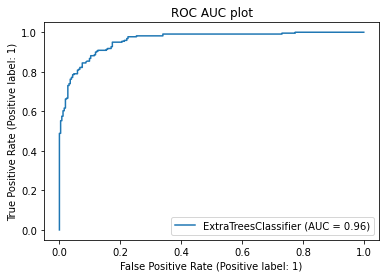

In [203]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

# Auc score is 96% and final accuracy is 88.55%

# Saving the model in pickle format

In [204]:
import joblib
joblib.dump(GCV.best_estimator_,"HR_Attrition_final.pkl")

['HR_Attrition_final.pkl']